In [18]:
import numpy as np
import itertools
import random
#from rankaggregation import Borda
from datetime import datetime
import matplotlib.pyplot as plt

### Travelling salesman functions

In [19]:
def data_input():
    print('Enter the number of cities : ')
    num_of_cities=int(input())
    dist_matrix=np.zeros((num_of_cities,num_of_cities))
    for a,b in itertools.combinations(range(num_of_cities),2):
        print('Distance between citiy ',a,'and',b,' : ')
        dist_matrix[a][b]=input()
        dist_matrix[b][a]=dist_matrix[a][b]
    return dist_matrix

In [20]:
def distance_travelled(route,dist_matrix):
    a=route+[route[0]]
    dist_travel=0
    for i in range(len(route)):
        dist_travel +=dist_matrix[a[i]][a[i+1]]
    return dist_travel

In [21]:
dist_matrix=data_input()
dist_matrix

Enter the number of cities : 
4
Distance between citiy  0 and 1  : 
10
Distance between citiy  0 and 2  : 
15
Distance between citiy  0 and 3  : 
20
Distance between citiy  1 and 2  : 
35
Distance between citiy  1 and 3  : 
25
Distance between citiy  2 and 3  : 
30


array([[ 0., 10., 15., 20.],
       [10.,  0., 35., 25.],
       [15., 35.,  0., 30.],
       [20., 25., 30.,  0.]])

#### Genetic function

In [48]:
def pop_generation(pop_size,high_rank):
    p=[]
    for i in range(pop_size):
        p.append(np.random.choice(high_rank, high_rank,replace=False).tolist())
    return p

In [49]:
def selection(ini_pop,dist_matrix):
    fitness=[]
    for i in range(len(ini_pop)):
        fitness=[distance_travelled(i,dist_matrix) for i in ini_pop]
    indices=np.argsort(fitness)
    f_indices=indices[:int(len(indices)/2)]
    return fitness,[ini_pop[i] for i in f_indices]

In [50]:
def borda_scores(ranks):
    ranks=ranks.astype(int)
    
    scores={}
    for k in range(np.min(ranks),np.max(ranks)+1):
        scores[k]=0
        
    for i in ranks:
        for j in range(len(i)):
            for k in range(np.min(ranks),np.max(ranks)+1):
                if i[j]==k:
                    scores[k] +=1*(j+1)
    return scores

In [51]:
def borda_solutions(ranks):
    fd = {}   
    for key, value in borda_scores(ranks).items(): 
        if value not in fd: 
            fd[value] = [key] 
        else: 
            fd[value].append(key)
            
    new_dict={}
    for a in np.sort(list(map(int,fd.keys()))).tolist():
        new_dict[a]=fd[a]
        
    k=list(new_dict.values())
    l=[]
    for i in range(len(k)):
        l=l+random.sample(k[i],len(k[i]))
    return l

In [52]:
def borda_crossover(pop):
    fb=[]
    for r in range(len(pop)*2):
        k=np.random.choice(len(pop),2,replace=False)
        ranks=np.array([pop[k[0]],pop[k[1]]])
        b=borda_solutions(ranks)
        fb.append(b)
    return fb

# Initial Conditions

In [53]:
pop_size=100
generation=1000

In [54]:
pop=pop_generation(pop_size,len(dist_matrix))
a=pop
#pop

In [55]:
start_time = datetime.now()
gener=0
mean=[]
median=[]
minimum=[]
for gen in range(generation):
    
    ####------------ selection---------------------------
    fit,ini_pop=selection(pop,dist_matrix)
    ####-------------------------------------------------
    
    ####------------mean, median & minimum---------------
    mean.append(np.mean(fit))
    median.append(np.median(fit))
    minimum.append(np.min(fit))
    
    #------------ crossover------------------------------
    crossover_pop=borda_crossover(ini_pop)
    #-----------------------------------------------------
    
    ####-----------mutation-------------------------------
    #mut_pop=[]
    #for j in range(len(crossover_pop)):
     #   mut_pop += [mutation(crossover_pop[j])]
    ####-------------------------------------------------
    
    pop=crossover_pop
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:45.087007


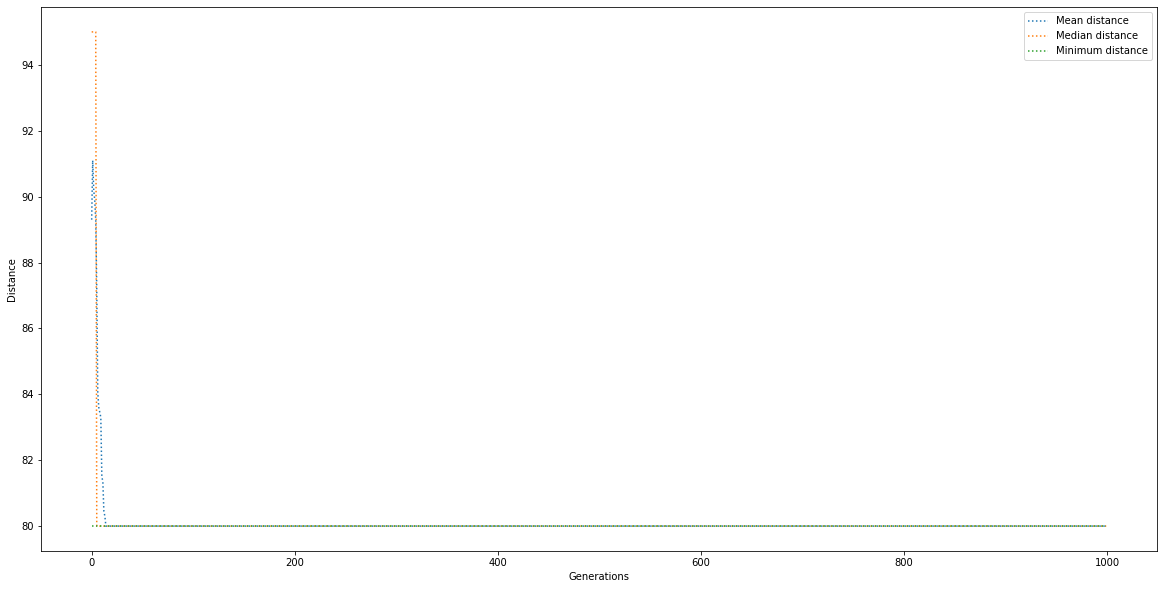

In [56]:
plt.figure(figsize=(20,10))
plt.plot(mean,':',label='Mean distance')
plt.plot(median,':',label='Median distance')
plt.plot(minimum,':',label='Minimum distance')
plt.xlabel('Generations')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [57]:
crossover_pop

[[2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1, 3],
 [2, 0, 1,